In [80]:
import pandas as pd
from sklearn.model_selection import KFold,train_test_split
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [11]:
titanic_train = pd.read_csv('titanic-train.csv')
titanic_train.shape

(891, 11)

In [12]:
titanic_test = pd.read_csv('titanic-test.csv')
titanic_test.shape

(418, 11)

In [13]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# converting cabin to binary attribute using dummy variable
titanic_train['Cabin'] = titanic_train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
titanic_test['Cabin'] = titanic_test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [83]:
# converting sex cateogorical variable to dummy variable
titanic_train['Sex'] = titanic_train["Sex"].replace({'male':0,'female':1})
titanic_test['Sex'] = titanic_test["Sex"].replace({'male':0,'female':1})

In [84]:
full_data = [titanic_train,titanic_test]
full_data

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0              1         0       3    0   22      1      0         A/5 21171   
 1              2         1       1    1   38      1      0          PC 17599   
 2              3         1       3    1   26      0      0  STON/O2. 3101282   
 3              4         1       1    1   35      1      0            113803   
 4              5         0       3    0   35      0      0            373450   
 ..           ...       ...     ...  ...  ...    ...    ...               ...   
 886          887         0       2    0   27      0      0            211536   
 887          888         1       1    1   19      0      0            112053   
 888          889         0       3    1   15      1      2        W./C. 6607   
 889          890         1       1    0   26      0      0            111369   
 890          891         0       3    0   32      0      0            370376   
 
         Fare  Cabin Embar

In [85]:
# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

<AxesSubplot:>

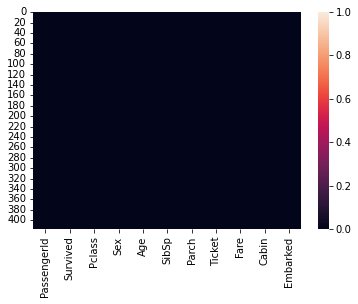

In [86]:
sns.heatmap(titanic_test.isnull()) # Age and Cabin has many null values

<AxesSubplot:>

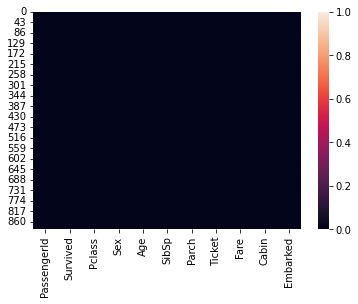

In [87]:
sns.heatmap(titanic_train.isnull()) # Age and Cabin has many null values

In [88]:
full_data = [titanic_train, titanic_train]
full_data

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0              1         0       3    0   22      1      0         A/5 21171   
 1              2         1       1    1   38      1      0          PC 17599   
 2              3         1       3    1   26      0      0  STON/O2. 3101282   
 3              4         1       1    1   35      1      0            113803   
 4              5         0       3    0   35      0      0            373450   
 ..           ...       ...     ...  ...  ...    ...    ...               ...   
 886          887         0       2    0   27      0      0            211536   
 887          888         1       1    1   19      0      0            112053   
 888          889         0       3    1   15      1      2        W./C. 6607   
 889          890         1       1    0   26      0      0            111369   
 890          891         0       3    0   32      0      0            370376   
 
         Fare  Cabin Embar

In [89]:
Y_full = full_data[0]['Survived']
X_full = full_data[0][['Sex','Pclass','Age','SibSp','Parch','Cabin']]

In [29]:
# X_train = titanic_train[['Sex','Pclass','Age','SibSp','Parch','Cabin']]
# Y_train = titanic_train['Survived']
# X_test = titanic_test[['Sex','Pclass','Age','SibSp','Parch','Cabin']]
# Y_test = titanic_test['Survived']

In [44]:
# X_full_data = [X_train,X_test]
# X_full_data

[        Sex  Pclass  Age  SibSp  Parch  Cabin
 0      male       3   22      1      0      1
 1    female       1   38      1      0      1
 2    female       3   26      0      0      1
 3    female       1   35      1      0      1
 4      male       3   35      0      0      1
 ..      ...     ...  ...    ...    ...    ...
 886    male       2   27      0      0      1
 887  female       1   19      0      0      1
 888  female       3   15      1      2      1
 889    male       1   26      0      0      1
 890    male       3   32      0      0      1
 
 [891 rows x 6 columns],
         Sex  Pclass  Age  SibSp  Parch  Cabin
 0      male       3   34      0      0      1
 1    female       3   47      1      0      1
 2      male       2   62      0      0      1
 3      male       3   27      0      0      1
 4    female       3   22      1      1      1
 ..      ...     ...  ...    ...    ...    ...
 413    male       3   39      0      0      1
 414  female       1   39      0 

In [37]:
# kf = KFold(n_splits=5)
# kf.get_n_splits(full_data)

5

In [38]:
#print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [69]:
# for train_index, test_index in kf.split(X_full):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X_full[train_index], X_full[test_index]
#     y_train, y_test = Y_full[train_index], Y_full[test_index]

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, random_state=0, test_size=0.1) 

In [91]:
X_train.shape

(801, 6)

In [92]:
X_test.shape

(90, 6)

In [93]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy') # entropy to measure the purity of the split 
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)